In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Step 1: Load Sample Data

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Feature6", "Feature7", "DelayRisk"]
df = pd.read_csv(url, names=columns)


# Step 2: Data Preprocessing

In [3]:
X = df.drop("DelayRisk", axis=1)
y = df["DelayRisk"]


# Encode categorical features if necessary

In [4]:
if y.dtype == 'O':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize features

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 3: Train ML Model

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Step 4: Evaluate Performance

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7597402597402597
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



# Step 5: Feature Importance Plot

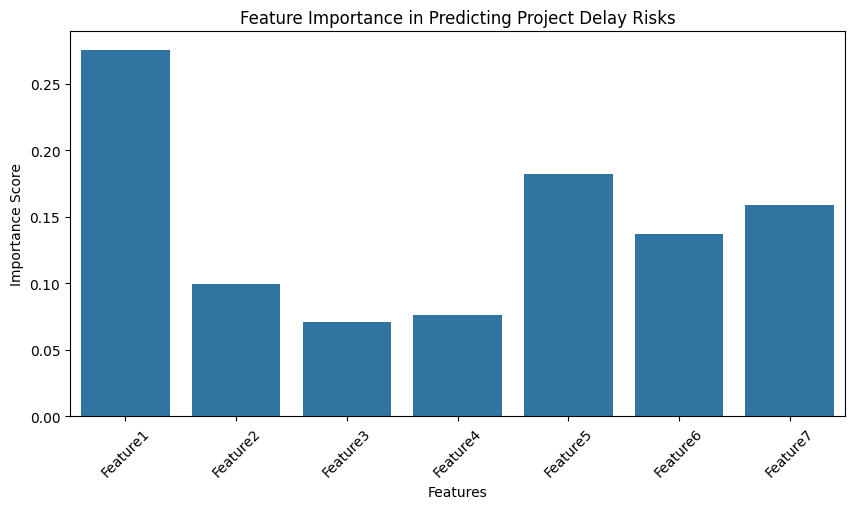

In [9]:
feature_importances = model.feature_importances_
plt.figure(figsize=(10,5))
sns.barplot(x=columns[:-1], y=feature_importances)
plt.title("Feature Importance in Predicting Project Delay Risks")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()
